In [1]:
import pandas as pd
import matplotlib.pylab as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA', FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',FutureWarning)
%matplotlib inline

In [2]:
df = pd.read_csv('colombo_rh_2012-2018.csv')
df.head()

,station_id,station_name,element_name,year,month,day,obs_val
0,43466,COLOMBO,RHMAX,2012,1,1,91.0
1,43466,COLOMBO,RHMAX,2012,1,2,90.0
2,43466,COLOMBO,RHMAX,2012,1,3,89.0
3,43466,COLOMBO,RHMAX,2012,1,4,89.0
4,43466,COLOMBO,RHMAX,2012,1,5,95.0


### Drop Unnecessary columns

In [3]:
df.drop(['station_id', 'station_name', 'element_name'], axis=1, inplace=True)
df.head()

,year,month,day,obs_val
0,2012,1,1,91.0
1,2012,1,2,90.0
2,2012,1,3,89.0
3,2012,1,4,89.0
4,2012,1,5,95.0


In [4]:
df.isna().sum()

year        0
month       0
day         0
obs_val    20
dtype: int64

In [28]:
null_df = df[df['obs_val'].isna() == True]
null_df

,obs_val,Ticks
Date,,


**Null `obs_val` can be dropped since the values which are null are basically dates does not exist.**

In [6]:
df.dropna(inplace=True)

**Concatenating the `year` , `month` and `day` columns to get the `Date` column**

In [7]:
df.reset_index(inplace=True)
df['Date'] = ''

for i in range(len(df)):
    year = df['year'][i]
    month = df['month'][i]
    day = df['day'][i]

    df['Date'][i]  = str(year) + "-" + str(month) + "-" + str(day)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_14148\3103108144.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'][i]  = str(year) + "-" + str(month) + "-" + str(day)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_14148\3103108144.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'][i]  = str(year) + "-" + str(month) + "-" + str(day)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_14148\3103108144.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

In [8]:
df.head()

,index,year,month,day,obs_val,Date
0,0,2012,1,1,91.0,2012-1-1
1,1,2012,1,2,90.0,2012-1-2
2,2,2012,1,3,89.0,2012-1-3
3,3,2012,1,4,89.0,2012-1-4
4,4,2012,1,5,95.0,2012-1-5


**Getting the mean value for the values which contain both RHMAX and RHMIN for the same date in the `element_name` column**

In [9]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.groupby(['Date']).mean()
df.head()

,index,year,month,day,obs_val
Date,,,,,
2012-01-01,0.0,2012.0,1.0,1.0,91.0
2012-01-02,1.0,2012.0,1.0,2.0,90.0
2012-01-03,2.0,2012.0,1.0,3.0,89.0
2012-01-04,3.0,2012.0,1.0,4.0,89.0
2012-01-05,4.0,2012.0,1.0,5.0,95.0


In [10]:
df.head()

,index,year,month,day,obs_val
Date,,,,,
2012-01-01,0.0,2012.0,1.0,1.0,91.0
2012-01-02,1.0,2012.0,1.0,2.0,90.0
2012-01-03,2.0,2012.0,1.0,3.0,89.0
2012-01-04,3.0,2012.0,1.0,4.0,89.0
2012-01-05,4.0,2012.0,1.0,5.0,95.0


**Dropping the `year`, `month`, `day` columns since the `Date` column is produced**

In [11]:
df.drop(['index','year','month','day'], axis=1, inplace=True)

In [12]:
df = df.sort_index()
df.head()

,obs_val
Date,
2012-01-01,91.0
2012-01-02,90.0
2012-01-03,89.0
2012-01-04,89.0
2012-01-05,95.0


In [13]:
df['Ticks'] = range(0,len(df.index.values))
df.head()

,obs_val,Ticks
Date,,
2012-01-01,91.0,0
2012-01-02,90.0,1
2012-01-03,89.0,2
2012-01-04,89.0,3
2012-01-05,95.0,4


### Checking if the data is stationary

In [14]:
def stationarity_check(ts):

    # Determing rolling statistics
    roll_mean = pd.Series(ts).rolling(window=12).mean()
    # Plot rolling statistics:
    plt.plot(ts, color='green',label='Original')
    plt.plot(roll_mean, color='blue', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show(block=False)

    # Perform Augmented Dickey-Fuller test:
    print('Augmented Dickey-Fuller test:')
    df_test = adfuller(ts)
    print("type of df_test: ",type(df_test))
    print("df_test: ",df_test)
    df_output = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print("df_output: \n",df_output)
    for key,value in df_test[4].items():
        df_output['Critical Value (%s)'%key] = value
    print(df_output)

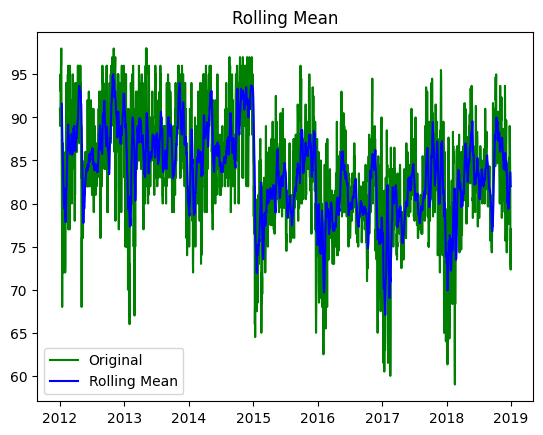

Augmented Dickey-Fuller test:
type of df_test:  <class 'tuple'>
df_test:  (-5.502017924271238, 2.0611269120115657e-06, 18, 2538, {'1%': -3.4329291671397715, '5%': -2.8626794698418867, '10%': -2.567376582654448}, 14254.950733006006)
df_output: 
 Test Statistic                   -5.502018
p-value                           0.000002
#Lags Used                       18.000000
Number of Observations Used    2538.000000
dtype: float64
Test Statistic                   -5.502018
p-value                           0.000002
#Lags Used                       18.000000
Number of Observations Used    2538.000000
Critical Value (1%)              -3.432929
Critical Value (5%)              -2.862679
Critical Value (10%)             -2.567377
dtype: float64


In [15]:
stationarity_check(df['obs_val'])

* H0 = Data is not stationary
* H1 = Data is stationary

* alpha = 0.05
* p-value = 0.000002

Since **p-value is less than alpha value** we reject H0 at 5% significance level. Hence, at 5% significance level the data is stationary

**Therefore, d value is 0**


In [16]:
df.index = pd.DatetimeIndex(df.index).to_period('D')

In [17]:
param_df = pd.DataFrame(columns=['params', 'AIC'])
param_df

,params,AIC


### Finding p and q values

In [18]:
import itertools
p = q = r = range(0, 4)
pqr = itertools.product(p, q , r)
for param in pqr:
    try:
        mod = ARIMA(df['obs_val'], order=param)
        results = mod.fit()
        print('ARMA{} - AIC:{}'.format(param, results.aic))
        data = {
            'params': param,
            'AIC': results.aic
        }
        param_df = param_df._append(data, ignore_index=True)

    except:
        continue

ARMA(0, 0, 0) - AIC:16728.409948880308
ARMA(0, 0, 1) - AIC:15458.923268318204
ARMA(0, 0, 2) - AIC:15009.14558306253
ARMA(0, 0, 3) - AIC:14814.12746042902
ARMA(0, 1, 0) - AIC:14873.760275417873
ARMA(0, 1, 1) - AIC:14660.323897777664
ARMA(0, 1, 2) - AIC:14521.494799999551
ARMA(0, 1, 3) - AIC:14455.452264774347
ARMA(0, 2, 0) - AIC:17163.436308691707
ARMA(0, 2, 1) - AIC:14878.920658174822
ARMA(0, 2, 2) - AIC:14666.387850095334


E:\conda\env\DPIN\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARMA(0, 2, 3) - AIC:14528.802240801997
ARMA(0, 3, 0) - AIC:20045.777263206575


E:\conda\env\DPIN\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARMA(0, 3, 1) - AIC:17167.58759217516
ARMA(0, 3, 2) - AIC:14906.285626889807


E:\conda\env\DPIN\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARMA(0, 3, 3) - AIC:14716.383979932645
ARMA(1, 0, 0) - AIC:14553.635122220669
ARMA(1, 0, 1) - AIC:14505.755536168042
ARMA(1, 0, 2) - AIC:14466.272247402245
ARMA(1, 0, 3) - AIC:14432.326743996426
ARMA(1, 1, 0) - AIC:14739.76669360431
ARMA(1, 1, 1) - AIC:14416.436173007483
ARMA(1, 1, 2) - AIC:14417.188901235042
ARMA(1, 1, 3) - AIC:14419.136418969783
ARMA(1, 2, 0) - AIC:16248.307043579089
ARMA(1, 2, 1) - AIC:14745.251361159068


E:\conda\env\DPIN\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARMA(1, 2, 2) - AIC:14425.567612360226


E:\conda\env\DPIN\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
E:\conda\env\DPIN\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARMA(1, 2, 3) - AIC:14426.619175375616
ARMA(1, 3, 0) - AIC:18406.82118366735
ARMA(1, 3, 1) - AIC:16253.696849041764


E:\conda\env\DPIN\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARMA(1, 3, 2) - AIC:14781.192242023777


E:\conda\env\DPIN\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
E:\conda\env\DPIN\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARMA(1, 3, 3) - AIC:1773.184807873657
ARMA(2, 0, 0) - AIC:14518.116238582314
ARMA(2, 0, 1) - AIC:14409.723062772771
ARMA(2, 0, 2) - AIC:14411.306429920398
ARMA(2, 0, 3) - AIC:14413.234107558674
ARMA(2, 1, 0) - AIC:14669.457113528752
ARMA(2, 1, 1) - AIC:14417.208186290292
ARMA(2, 1, 2) - AIC:14418.51734837041


E:\conda\env\DPIN\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
E:\conda\env\DPIN\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARMA(2, 1, 3) - AIC:14420.34936436847
ARMA(2, 2, 0) - AIC:15845.59340029857
ARMA(2, 2, 1) - AIC:14675.277237211758
ARMA(2, 2, 2) - AIC:14426.439182714632


E:\conda\env\DPIN\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
E:\conda\env\DPIN\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARMA(2, 2, 3) - AIC:14428.21933353728
ARMA(2, 3, 0) - AIC:17594.8400894703
ARMA(2, 3, 1) - AIC:15851.763201308073


E:\conda\env\DPIN\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARMA(2, 3, 2) - AIC:14691.334228487687


E:\conda\env\DPIN\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
E:\conda\env\DPIN\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARMA(2, 3, 3) - AIC:14784.953019605244
ARMA(3, 0, 0) - AIC:14500.45188173215
ARMA(3, 0, 1) - AIC:14411.298660980176


E:\conda\env\DPIN\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
E:\conda\env\DPIN\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
E:\conda\env\DPIN\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARMA(3, 0, 2) - AIC:14412.33791804592
ARMA(3, 0, 3) - AIC:14414.18001801585
ARMA(3, 1, 0) - AIC:14614.935528894574
ARMA(3, 1, 1) - AIC:14419.169585273827
ARMA(3, 1, 2) - AIC:14421.161393924089


E:\conda\env\DPIN\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARMA(3, 1, 3) - AIC:14419.353687782594
ARMA(3, 2, 0) - AIC:15596.662138599182
ARMA(3, 2, 1) - AIC:14621.04928691279


E:\conda\env\DPIN\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
E:\conda\env\DPIN\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARMA(3, 2, 2) - AIC:14449.80403996578


E:\conda\env\DPIN\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARMA(3, 2, 3) - AIC:14527.109686302842
ARMA(3, 3, 0) - AIC:17063.002049938907
ARMA(3, 3, 1) - AIC:15603.465056071482


E:\conda\env\DPIN\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARMA(3, 3, 2) - AIC:14638.546195746225


E:\conda\env\DPIN\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARMA(3, 3, 3) - AIC:14696.05392214067


In [19]:
param_df

,params,AIC
0,"(0, 0, 0)",16728.409949
1,"(0, 0, 1)",15458.923268
2,"(0, 0, 2)",15009.145583
3,"(0, 0, 3)",14814.127460
4,"(0, 1, 0)",14873.760275
...,...,...
59,"(3, 2, 3)",14527.109686
60,"(3, 3, 0)",17063.002050
61,"(3, 3, 1)",15603.465056
62,"(3, 3, 2)",14638.546196


In [20]:
param_df[param_df['AIC'] == min(param_df['AIC'])]

,params,AIC
31,"(1, 3, 3)",1773.184808


In [21]:
param_df['p'] = ''
param_df['d'] = ''
param_df['q'] = ''

for i in range(0, len(param_df)):
    p, d, q = param_df['params'][i]

    param_df['p'][i] = p
    param_df['d'][i] = d
    param_df['q'][i] = q


param_df.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14148\128021719.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  param_df['p'][i] = p
C:\Users\ASUS\AppData\Local\Temp\ipykernel_14148\128021719.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  param_df['d'][i] = d
C:\Users\ASUS\AppData\Local\Temp\ipykernel_14148\128021719.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  param_df['q'][i] = q
C:\Users\ASUS\AppData\Local\Temp\ipykernel

,params,AIC,p,d,q
0,"(0, 0, 0)",16728.409949,0,0,0
1,"(0, 0, 1)",15458.923268,0,0,1
2,"(0, 0, 2)",15009.145583,0,0,2
3,"(0, 0, 3)",14814.127460,0,0,3
4,"(0, 1, 0)",14873.760275,0,1,0


In [22]:
stationary_df = param_df[param_df['d'] == 0]
stationary_df.head()

,params,AIC,p,d,q
0,"(0, 0, 0)",16728.409949,0,0,0
1,"(0, 0, 1)",15458.923268,0,0,1
2,"(0, 0, 2)",15009.145583,0,0,2
3,"(0, 0, 3)",14814.127460,0,0,3
16,"(1, 0, 0)",14553.635122,1,0,0


In [23]:
stationary_df[stationary_df['AIC'] == min(stationary_df['AIC'])]

,params,AIC,p,d,q
33,"(2, 0, 1)",14409.723063,2,0,1


By considering the **least AIC** and the previously found 0 D value, **p, d, q** is taken as **2, 0, 1**.

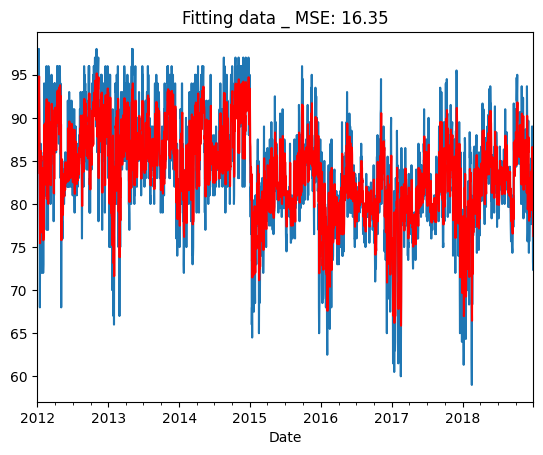

In [24]:
model = ARIMA(df['obs_val'], order=(2,0,1))
results = model.fit()
df['obs_val'].plot()
plt.plot(results.fittedvalues, color='red')
plt.title('Fitting data _ MSE: %.2f'% (((results.fittedvalues - df['obs_val'])**2).mean()))
plt.show()

### saving the model

In [25]:
import pickle
# Writing different model files to file
with open( 'model.sav', 'wb') as f:
    pickle.dump(results,f)